In [25]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
from tqdm import tqdm
from selenium.webdriver import ActionChains
from selenium.common.exceptions import StaleElementReferenceException, TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

url = "https://www.koreabaseball.com/Record/Player/PitcherBasic/BasicOld.aspx"
driver = webdriver.Chrome(service = Service("/home/uk/dev_ws/EDA/driver/chromedriver-linux64/chromedriver"))

driver.get(url)

# 1번 문제에 이어서 1983년도부터 1988년도까지 최동원 선수의 데이터만 뽑는다

In [10]:
num = []
name = []
team_name = []
ERA_RT = []
GAME_CN = []
CG_CN = []
SHO_CN = []
W_CN = []
L_CN = []
SV_CN = []
HOLD_CN = []
WRA_RT = []
PA_CN = []
INN2_CN = []
HIT_CN = []
HR_CN = []
BB_CN = []
HP_CN = []
KK_CN = []
R_CN = []
ER_CN = []
year_all = []

wait = WebDriverWait(driver, 10)

for i in range(1, 7): 
    year_list = driver.find_element(By.ID, 'cphContents_cphContents_cphContents_ddlSeason_ddlSeason') 
    old = year_list.find_elements(By.TAG_NAME, 'option') 
    year_list.click() 

    wait.until(EC.element_to_be_clickable(old[i])).click()  
    time.sleep(1) 

    team = driver.find_element(By.ID, 'cphContents_cphContents_cphContents_ddlTeam_ddlTeam')  
    wait.until(EC.presence_of_all_elements_located((By.TAG_NAME, 'option')))

    for z in range(1, len(driver.find_element(By.ID, 'cphContents_cphContents_cphContents_ddlTeam_ddlTeam')
                         .find_elements(By.TAG_NAME, 'option'))):
        team = driver.find_element(By.ID, 'cphContents_cphContents_cphContents_ddlTeam_ddlTeam')  
        team_list = team.find_elements(By.TAG_NAME, 'option')  
        wait.until(EC.element_to_be_clickable(team_list[z])).click()  
        time.sleep(1)  
        
        twosu_all = driver.find_element(By.CLASS_NAME,'record_result')
        twosu_info = twosu_all.find_elements(By.TAG_NAME,'tr')

        for a in twosu_info:
            twosu_info_list = a.find_elements(By.TAG_NAME,'td')
            if twosu_info_list: # td가 있는 경우에만 추가
                num.append(twosu_info_list[0].text)
                name.append(twosu_info_list[1].text)
                team_name.append(twosu_info_list[2].text)
                ERA_RT.append(twosu_info_list[3].text)
                GAME_CN.append(twosu_info_list[4].text)
                CG_CN.append(twosu_info_list[5].text)
                SHO_CN.append(twosu_info_list[6].text)
                W_CN.append(twosu_info_list[7].text)
                L_CN.append(twosu_info_list[8].text)
                SV_CN.append(twosu_info_list[9].text)
                HOLD_CN.append(twosu_info_list[10].text)
                WRA_RT.append(twosu_info_list[11].text)
                PA_CN.append(twosu_info_list[12].text)
                INN2_CN.append(twosu_info_list[13].text)
                HIT_CN.append(twosu_info_list[14].text)
                HR_CN.append(twosu_info_list[15].text)
                BB_CN.append(twosu_info_list[16].text)
                HP_CN.append(twosu_info_list[17].text)
                KK_CN.append(twosu_info_list[18].text)
                R_CN.append(twosu_info_list[19].text)
                ER_CN.append(twosu_info_list[20].text)
                year_all.append("198%d"%(i+2))
print(year_all)
print(num)
print(name)
print(team_name)
print(ERA_RT)
print(GAME_CN)
print(CG_CN)
print(SHO_CN) 
print(L_CN)
print(SV_CN)
print(HOLD_CN)
print(WRA_RT)
print(PA_CN)
print(INN2_CN)
print(HIT_CN)
print(HR_CN)
print(HIT_CN)
print(BB_CN)
print(HP_CN)
print(KK_CN)
print(R_CN)
print(ER_CN)

['1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1983', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1984', '1985', '1985', '1985', '1985', '1985', '1985', '1985', '1985', '1985', '1985', '1985',

In [11]:
data_3 = {
    "년도":year_all,
    "순위": num,
    "이름": name,
    "팀": team_name,
    "ERA_RT": ERA_RT,
    "GAME_CN": GAME_CN,
    "CG_CN": CG_CN,
    "SHO_CN": SHO_CN,
    "W_CN": W_CN,
    "L_CN": L_CN,
    "SV_CN": SV_CN,
    "HOLD_CN": HOLD_CN,
    "WRA_RT": WRA_RT,
    "PA_CN": PA_CN,
    "INN2_CN": INN2_CN,
    "HIT_CN": HIT_CN,
    "HR_CN": HR_CN,
    "BB_CN": BB_CN,
    "HP_CN": HP_CN,
    "KK_CN": KK_CN,
    "R_CN": R_CN,
    "ER_CN": ER_CN
}

dz = pd.DataFrame(data_3)

dz

,년도,순위,이름,팀,ERA_RT,GAME_CN,CG_CN,SHO_CN,W_CN,L_CN,...,WRA_RT,PA_CN,INN2_CN,HIT_CN,HR_CN,BB_CN,HP_CN,KK_CN,R_CN,ER_CN
0,1983,1,김성한,해태,2.08,4,1,1,1,1,...,0.500,71,17 1/3,13,1,5,1,8,6,4
1,1983,2,황기선,해태,2.31,19,0,0,4,4,...,0.500,265,66 1/3,50,3,14,7,35,27,17
2,1983,3,이상윤,해태,2.67,46,14,3,20,10,...,0.667,944,229 1/3,181,10,95,4,178,83,68
3,1983,4,강만식,해태,2.78,22,1,1,6,4,...,0.600,387,94,83,5,22,5,51,42,29
4,1983,5,김용남,해태,2.83,36,6,3,13,10,...,0.565,731,181 1/3,171,12,30,5,80,67,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,1988,10,임호균,태평양,7.07,5,0,0,0,3,...,0.000,68,14,23,1,10,0,4,13,11
448,1988,11,박상범,태평양,7.09,10,2,0,1,1,...,0.500,142,33,41,4,5,2,20,26,26
449,1988,12,박정현,태평양,7.71,6,0,0,0,1,...,0.000,86,18 2/3,25,4,8,2,8,17,16
450,1988,13,최창호,태평양,8.10,3,0,0,0,1,...,0.000,29,6 2/3,6,1,4,0,3,6,6


In [22]:
dz = dz[dz['이름'] != '최동원']

In [21]:
# 이름이 "최동원"인 데이터만 필터링
dk = dz[dz['이름'] == '최동원']

# 결과 출력
dk

,년도,순위,이름,팀,ERA_RT,GAME_CN,CG_CN,SHO_CN,W_CN,L_CN,...,WRA_RT,PA_CN,INN2_CN,HIT_CN,HR_CN,BB_CN,HP_CN,KK_CN,R_CN,ER_CN
46,1983,1,최동원,롯데,2.89,38,16,1,9,16,...,0.360,863,208 2/3,202,17,51,8,148,89,67
57,1984,3,최동원,롯데,2.40,51,14,1,27,13,...,0.675,1132,284 2/3,228,18,68,14,223,91,76
124,1985,1,최동원,롯데,1.92,42,14,4,20,9,...,0.690,865,225,170,7,41,8,161,60,48
233,1986,1,최동원,롯데,1.55,39,17,4,19,14,...,0.576,1039,267,204,7,55,6,208,60,46
301,1987,3,최동원,롯데,2.81,32,15,4,14,12,...,0.538,920,224,218,6,61,7,163,80,70
389,1988,1,최동원,롯데,2.05,16,3,1,7,3,...,0.700,349,83 1/3,77,4,24,1,83,24,19


In [2]:
num = []
name = []
team_name = []
ERA_RT = []
GAME_CN = []
W_CN = []
L_CN = []
SV_CN = []
HOLD_CN = []
WRA_RT = []
INN2_CN = []
HIT_CN = []
HR_CN = []
BB_CN = []
HP_CN = []
KK_CN = []
R_CN = []
ER_CN = []
WHIP_RT = []
year_all = []

wait = WebDriverWait(driver, 10)

for i in range(33, 38): 
    year_list = driver.find_element(By.ID, 'cphContents_cphContents_cphContents_ddlSeason_ddlSeason') 
    old = year_list.find_elements(By.TAG_NAME, 'option') 
    year_list.click() 

    wait.until(EC.element_to_be_clickable(old[i])).click()  
    time.sleep(1) 

    team = driver.find_element(By.ID, 'cphContents_cphContents_cphContents_ddlTeam_ddlTeam')  
    wait.until(EC.presence_of_all_elements_located((By.TAG_NAME, 'option')))

    for z in range(1, len(driver.find_element(By.ID, 'cphContents_cphContents_cphContents_ddlTeam_ddlTeam')
                         .find_elements(By.TAG_NAME, 'option'))):
        team = driver.find_element(By.ID, 'cphContents_cphContents_cphContents_ddlTeam_ddlTeam')  
        team_list = team.find_elements(By.TAG_NAME, 'option')  
        wait.until(EC.element_to_be_clickable(team_list[z])).click()  
        time.sleep(1)  
        
        twosu_all = driver.find_element(By.CLASS_NAME,'record_result')
        twosu_info = twosu_all.find_elements(By.TAG_NAME,'tr')

        for a in twosu_info:
            twosu_info_list = a.find_elements(By.TAG_NAME,'td')
            if twosu_info_list: # td가 있는 경우에만 추가
                num.append(twosu_info_list[0].text)
                name.append(twosu_info_list[1].text)
                team_name.append(twosu_info_list[2].text)
                ERA_RT.append(twosu_info_list[3].text)
                GAME_CN.append(twosu_info_list[4].text)
                W_CN.append(twosu_info_list[5].text)
                L_CN.append(twosu_info_list[6].text)
                SV_CN.append(twosu_info_list[7].text)
                HOLD_CN.append(twosu_info_list[8].text)
                WRA_RT.append(twosu_info_list[9].text)
                INN2_CN.append(twosu_info_list[10].text)
                HIT_CN.append(twosu_info_list[11].text)
                HR_CN.append(twosu_info_list[12].text)
                BB_CN.append(twosu_info_list[13].text)
                HP_CN.append(twosu_info_list[14].text)
                KK_CN.append(twosu_info_list[15].text)
                R_CN.append(twosu_info_list[16].text)
                ER_CN.append(twosu_info_list[17].text)
                WHIP_RT.append(twosu_info_list[18].text)
                year_all.append("20%d"%(i-18))
print(year_all)
print(num)
print(name)
print(team_name)
print(ERA_RT)
print(GAME_CN)
print(W_CN)
print(L_CN)
print(SV_CN)
print(HOLD_CN)
print(WRA_RT)
print(INN2_CN)
print(HIT_CN)
print(HR_CN)
print(HIT_CN)
print(BB_CN)
print(HP_CN)
print(KK_CN)
print(R_CN)
print(ER_CN)
print(WHIP_RT)

['2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015',

In [12]:
url = "https://statiz.sporki.com/stats/?m=main&m2=pitching&m3=value&so=WAR&ob=DESC&year=2015"
driver_2 = webdriver.Chrome(service = Service("/home/uk/dev_ws/EDA/driver/chromedriver-linux64/chromedriver"))

driver_2.get(url)

In [13]:
name_2 = []
money = []
zn = []
year_all_2 = []

for i in range(5):
    # 년도 버튼 클릭
    buttons = driver_2.find_element(By.CLASS_NAME,"content_op_area")
    buttons_2 = buttons.find_element(By.CLASS_NAME, "label")
    buttons_2.click()
    # 2015년부터 2019년 클릭
    year_click = buttons.find_elements(By.CLASS_NAME,"option_item")
    year_click[34+i].click()

    all_info = driver_2.find_element(By.TAG_NAME, "tbody")
    scroll = all_info.find_elements(By.TAG_NAME, "tr")
    # 중간까지 스크롤 내리기
    driver_2.execute_script("arguments[0].scrollIntoView();",scroll[10])
    
    all_info_2 = driver_2.find_elements(By.TAG_NAME,"tr")
    for z in all_info_2:
        zn = z.find_elements(By.TAG_NAME,"td")
        if zn:
            name_2.append(zn[1].text)
            money.append(zn[24].text)
            year_all_2.append("20%d"%(i+15))
print(len(name_2))
print(len(money))

108
108


In [5]:
data = {
    "년도":year_all,
    "순위": num,
    "이름": name,
    "팀": team_name,
    "ERA_RT": ERA_RT,
    "GAME_CN": GAME_CN,
    "W_CN": W_CN,
    "L_CN": L_CN,
    "SV_CN": SV_CN,
    "HOLD_CN": HOLD_CN,
    "WRA_RT": WRA_RT,
    "INN2_CN": INN2_CN,
    "HIT_CN": HIT_CN,
    "HR_CN": HR_CN,
    "BB_CN": BB_CN,
    "HP_CN": HP_CN,
    "KK_CN": KK_CN,
    "R_CN": R_CN,
    "ER_CN": ER_CN,
    "WHIP_RT": WHIP_RT
}
dc = pd.DataFrame(data)
dc

,년도,순위,이름,팀,ERA_RT,GAME_CN,W_CN,L_CN,SV_CN,HOLD_CN,WRA_RT,INN2_CN,HIT_CN,HR_CN,BB_CN,HP_CN,KK_CN,R_CN,ER_CN,WHIP_RT
0,2015,1,오장훈,두산,0.00,1,0,0,0,0,-,1,1,0,1,0,2,0,0,2.00
1,2015,2,김강률,두산,2.45,16,3,1,0,3,0.750,14 2/3,14,1,10,0,7,5,4,1.64
2,2015,3,이현승,두산,2.89,41,3,1,18,2,0.750,46 2/3,45,3,10,2,41,16,15,1.18
3,2015,4,허준혁,두산,3.57,16,3,2,0,0,0.600,63,52,7,41,6,45,37,25,1.48
4,2015,5,함덕주,두산,3.65,68,7,2,2,16,0.778,61 2/3,52,4,46,2,76,30,25,1.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2019,26,이인복,롯데,11.68,11,0,0,0,0,-,12 1/3,29,2,8,0,7,18,16,3.00
1246,2019,27,정태승,롯데,27.00,1,0,0,0,0,-,1,2,0,1,0,2,3,3,3.00
1247,2019,27,최하늘,롯데,27.00,2,0,1,0,0,0.000,2,4,2,2,1,1,6,6,3.00
1248,2019,29,이승헌,롯데,31.50,1,0,1,0,0,0.000,2,7,0,3,1,0,7,7,5.00


In [6]:
len(dc["이름"].unique())

507

In [14]:
data_2 = {
    "년도": year_all_2,
    "이름":name_2,
    "연봉":money
}
df = pd.DataFrame(data_2)
df

,년도,이름,연봉
0,2015,양현종,40000
1,2015,린드블럼,85000
2,2015,해커,40000
3,2015,밴헤켄,65000
4,2015,윤성환,80000
...,...,...,...
103,2019,차우찬,100000
104,2019,윌랜드,70000
105,2019,윤성환,40000
106,2019,김민,4000


In [16]:
import pandas as pd

du = pd.merge(dc, df, on=['년도', '이름'], how='left')
du = du.dropna(subset=['연봉'])
du = du.reset_index()
du

,index,년도,순위,이름,팀,ERA_RT,GAME_CN,W_CN,L_CN,SV_CN,...,INN2_CN,HIT_CN,HR_CN,BB_CN,HP_CN,KK_CN,R_CN,ER_CN,WHIP_RT,연봉
0,5,2015,6,유희관,두산,3.94,30,18,5,0,...,189 2/3,193,23,44,4,126,84,83,1.25,20000
1,7,2015,8,장원준,두산,4.08,30,12,12,0,...,169 2/3,182,13,68,14,128,86,77,1.47,100000
2,30,2015,5,피가로,삼성,3.38,25,13,7,0,...,165,154,16,51,7,117,66,62,1.24,60000
3,31,2015,6,윤성환,삼성,3.76,30,17,8,0,...,194,199,27,30,10,164,86,81,1.18,80000
4,33,2015,8,차우찬,삼성,4.79,31,13,7,0,...,173,160,28,74,5,194,98,92,1.35,30000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1180,2019,10,윤성환,삼성,4.77,27,8,13,0,...,145 1/3,168,14,50,7,65,87,77,1.50,40000
104,1194,2019,3,채드벨,한화,3.50,29,11,10,0,...,177 1/3,169,14,63,10,134,73,69,1.31,40000
105,1195,2019,4,서폴드,한화,3.51,31,12,11,0,...,192 1/3,191,8,54,8,135,84,75,1.27,70000
106,1224,2019,5,레일리,롯데,3.88,30,5,14,0,...,181,191,10,65,8,140,88,78,1.41,117000


In [23]:
dz

,년도,순위,이름,팀,ERA_RT,GAME_CN,CG_CN,SHO_CN,W_CN,L_CN,...,WRA_RT,PA_CN,INN2_CN,HIT_CN,HR_CN,BB_CN,HP_CN,KK_CN,R_CN,ER_CN
0,1983,1,김성한,해태,2.08,4,1,1,1,1,...,0.500,71,17 1/3,13,1,5,1,8,6,4
1,1983,2,황기선,해태,2.31,19,0,0,4,4,...,0.500,265,66 1/3,50,3,14,7,35,27,17
2,1983,3,이상윤,해태,2.67,46,14,3,20,10,...,0.667,944,229 1/3,181,10,95,4,178,83,68
3,1983,4,강만식,해태,2.78,22,1,1,6,4,...,0.600,387,94,83,5,22,5,51,42,29
4,1983,5,김용남,해태,2.83,36,6,3,13,10,...,0.565,731,181 1/3,171,12,30,5,80,67,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,1988,10,임호균,태평양,7.07,5,0,0,0,3,...,0.000,68,14,23,1,10,0,4,13,11
448,1988,11,박상범,태평양,7.09,10,2,0,1,1,...,0.500,142,33,41,4,5,2,20,26,26
449,1988,12,박정현,태평양,7.71,6,0,0,0,1,...,0.000,86,18 2/3,25,4,8,2,8,17,16
450,1988,13,최창호,태평양,8.10,3,0,0,0,1,...,0.000,29,6 2/3,6,1,4,0,3,6,6


In [24]:
dk

,년도,순위,이름,팀,ERA_RT,GAME_CN,CG_CN,SHO_CN,W_CN,L_CN,...,WRA_RT,PA_CN,INN2_CN,HIT_CN,HR_CN,BB_CN,HP_CN,KK_CN,R_CN,ER_CN
46,1983,1,최동원,롯데,2.89,38,16,1,9,16,...,0.360,863,208 2/3,202,17,51,8,148,89,67
57,1984,3,최동원,롯데,2.40,51,14,1,27,13,...,0.675,1132,284 2/3,228,18,68,14,223,91,76
124,1985,1,최동원,롯데,1.92,42,14,4,20,9,...,0.690,865,225,170,7,41,8,161,60,48
233,1986,1,최동원,롯데,1.55,39,17,4,19,14,...,0.576,1039,267,204,7,55,6,208,60,46
301,1987,3,최동원,롯데,2.81,32,15,4,14,12,...,0.538,920,224,218,6,61,7,163,80,70
389,1988,1,최동원,롯데,2.05,16,3,1,7,3,...,0.700,349,83 1/3,77,4,24,1,83,24,19


In [20]:
print(dz.columns)
print(du.columns)

Index(['년도', '순위', '이름', '팀', 'ERA_RT', 'GAME_CN', 'CG_CN', 'SHO_CN', 'W_CN',
       'L_CN', 'SV_CN', 'HOLD_CN', 'WRA_RT', 'PA_CN', 'INN2_CN', 'HIT_CN',
       'HR_CN', 'BB_CN', 'HP_CN', 'KK_CN', 'R_CN', 'ER_CN'],
      dtype='object')
Index(['index', '년도', '순위', '이름', '팀', 'ERA_RT', 'GAME_CN', 'W_CN', 'L_CN',
       'SV_CN', 'HOLD_CN', 'WRA_RT', 'INN2_CN', 'HIT_CN', 'HR_CN', 'BB_CN',
       'HP_CN', 'KK_CN', 'R_CN', 'ER_CN', 'WHIP_RT', '연봉'],
      dtype='object')


In [43]:
# 삭제하려는 열 목록
drop_labels_dz = ["이름", "팀", "CG_CN", "SHO_CN", "SV_CN", "HOLD_CN", 
                  "PA_CN", "INN2_CN", "HIT_CN", "HR_CN", "BB_CN", 
                  "HP_CN", "KK_CN"]

drop_labels_du = ["이름","index", "팀", "SV_CN", "HOLD_CN", "INN2_CN", "HIT_CN", 
                  "HR_CN", "BB_CN", "HP_CN", "KK_CN", "WHIP_RT"]

drop_labels_dk = ["이름", "팀", "CG_CN", "SHO_CN", "SV_CN", "HOLD_CN", 
                  "PA_CN", "INN2_CN", "HIT_CN", "HR_CN", "BB_CN", 
                  "HP_CN", "KK_CN"]

# 실제 열 목록과 비교
print("dz에 없는 열:", set(drop_labels_dz) - set(dz.columns))
print("du에 없는 열:", set(drop_labels_du) - set(du.columns))
print("dk에 없는 열:", set(drop_labels_dk) - set(dk.columns))


dz에 없는 열: {'HOLD_CN', 'BB_CN', '이름', 'KK_CN', 'HP_CN', 'PA_CN', 'HIT_CN', 'SV_CN', '팀', 'CG_CN', 'HR_CN', 'SHO_CN', 'INN2_CN'}
du에 없는 열: {'HOLD_CN', 'index', 'KK_CN', 'BB_CN', 'HP_CN', 'HIT_CN', 'SV_CN', '팀', 'HR_CN', 'WHIP_RT', 'INN2_CN'}
dk에 없는 열: {'HOLD_CN', 'BB_CN', '이름', 'KK_CN', 'HP_CN', 'PA_CN', 'HIT_CN', 'SV_CN', '팀', 'CG_CN', 'HR_CN', 'SHO_CN', 'INN2_CN'}


In [41]:
dz

,년도,순위,ERA_RT,GAME_CN,W_CN,L_CN,WRA_RT,R_CN,ER_CN
0,1983,1,2.08,4,1,1,0.500,6,4
1,1983,2,2.31,19,4,4,0.500,27,17
2,1983,3,2.67,46,20,10,0.667,83,68
3,1983,4,2.78,22,6,4,0.600,42,29
4,1983,5,2.83,36,13,10,0.565,67,57
...,...,...,...,...,...,...,...,...,...
447,1988,10,7.07,5,0,3,0.000,13,11
448,1988,11,7.09,10,1,1,0.500,26,26
449,1988,12,7.71,6,0,1,0.000,17,16
450,1988,13,8.10,3,0,1,0.000,6,6


In [42]:
dk

,년도,순위,ERA_RT,GAME_CN,W_CN,L_CN,WRA_RT,R_CN,ER_CN
46,1983,1,2.89,38,9,16,0.360,89,67
57,1984,3,2.40,51,27,13,0.675,91,76
124,1985,1,1.92,42,20,9,0.690,60,48
233,1986,1,1.55,39,19,14,0.576,60,46
301,1987,3,2.81,32,14,12,0.538,80,70
389,1988,1,2.05,16,7,3,0.700,24,19


In [48]:
du = du.drop(["이름"], axis=1)

In [50]:
du

,년도,순위,ERA_RT,GAME_CN,W_CN,L_CN,WRA_RT,R_CN,ER_CN,연봉
0,2015,6,3.94,30,18,5,0.783,84,83,20000
1,2015,8,4.08,30,12,12,0.500,86,77,100000
2,2015,5,3.38,25,13,7,0.650,66,62,60000
3,2015,6,3.76,30,17,8,0.680,86,81,80000
4,2015,8,4.79,31,13,7,0.650,98,92,30000
...,...,...,...,...,...,...,...,...,...,...
103,2019,10,4.77,27,8,13,0.381,87,77,40000
104,2019,3,3.50,29,11,10,0.524,73,69,40000
105,2019,4,3.51,31,12,11,0.522,84,75,70000
106,2019,5,3.88,30,5,14,0.263,88,78,117000


In [55]:
features = ['ERA_RT','GAME_CN','W_CN','L_CN','WRA_RT','R_CN','ER_CN']
target = '연봉'

X_modern = du[features]
y_modern = du[target]

X_past = dz[features]
X_choi = dk[features]

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_modern, y_modern, test_size=0.2
                                                    , random_state=13)
model = RandomForestRegressor(n_estimators=100, random_state=13)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=13)

In [57]:
importance = model.feature_importances_
for col, imp in zip(features, importance):
    print(f"{col}: {imp:.4f}")

ERA_RT: 0.3093
GAME_CN: 0.0560
W_CN: 0.1932
L_CN: 0.0399
WRA_RT: 0.0805
R_CN: 0.2094
ER_CN: 0.1117


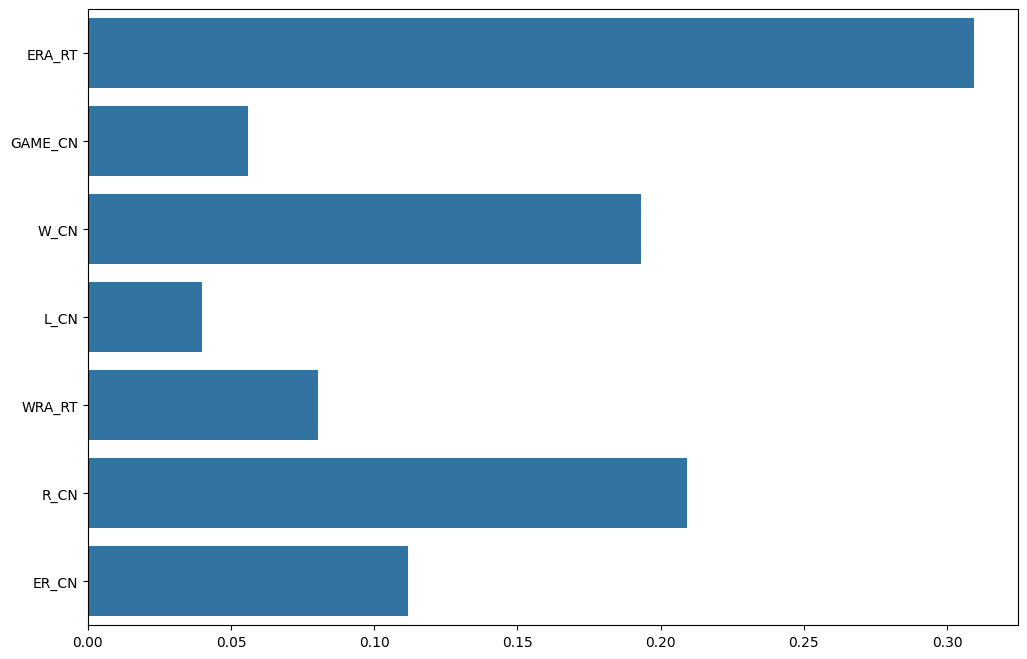

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
sns.barplot(x= importance, y=features)
plt.show()